In [31]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [35]:
#Printing the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [37]:
##Dataframe attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [39]:
##Drop dupplicate column(Temp C) and Unnamed column
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [41]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [43]:
##print all duplicated rows
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [45]:
##Drop duplicated rows
data1.drop_duplicates(keep='first',inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [47]:
#Change column names(Rename the columns)
data1.rename({'Solar.R': 'Solar'},axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


##Impute the missing values in the table

In [50]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [52]:
##Display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

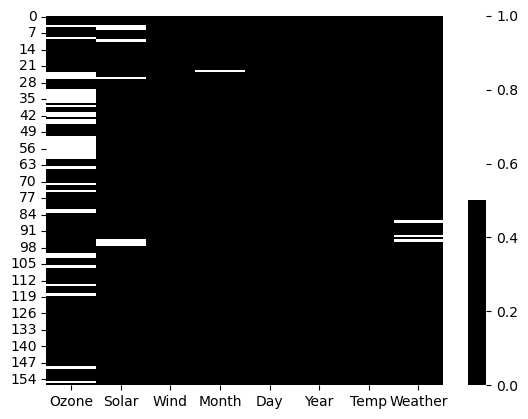

In [54]:
##Visualize data1 missing values using heat map
cols = data1.columns
colors = ['black','white']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [56]:
##Find the mean and median values of each numeric
##Inmputation os missing value with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [58]:
#REplace the ozone missing values with median value
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [60]:
data1['Solar'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [62]:
data1['Solar'] = data1['Ozone'].fillna(mean_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [64]:
##Find the mode values of categorical column (weather)
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [66]:
##IMpute missing values(Replace Nan with mode etc.) of "weather" using fillna()
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [68]:
print(data1["Month"].value_counts())
mode_weather = data1["Month"].mode()[0]
print(mode_weather)

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


In [70]:
##IMpute missing values(Replace Nan with mode etc.) of "weather" using fillna()
data1["Month"] = data1["Month"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

##Detection of outliers in the columns
##Method1:Using histigrams and box plots

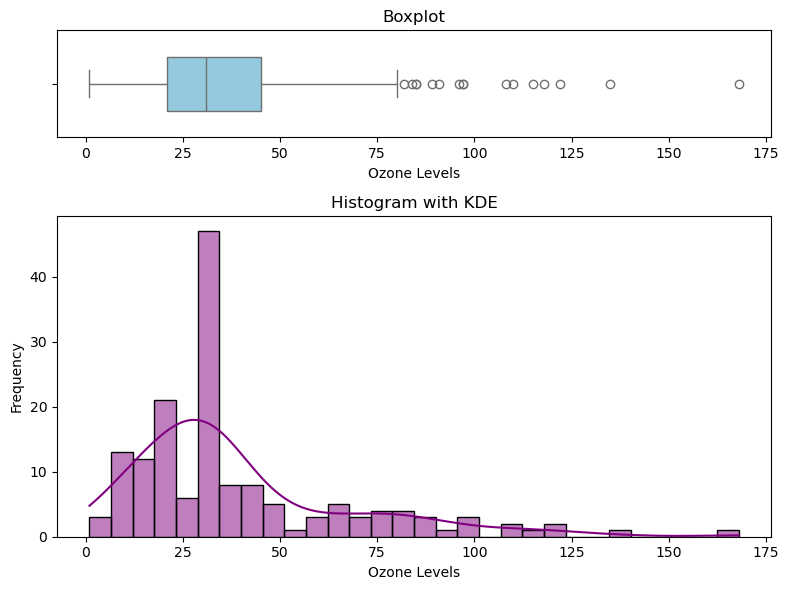

In [73]:
##Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6),gridspec_kw={'height_ratios': [1., 3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

#Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

#Adjust Layout for better spacing
plt.tight_layout()

##Show the plot
plt.show()

Observations
.The ozone column has extreme values beyond 81 as seen from plot
.The same is conrfimed from the below right-skewed histogram

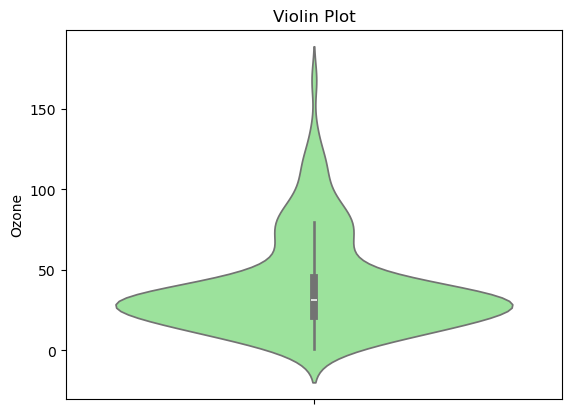

In [76]:
##create a figure for viol in plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

#show the plot 
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x20a7425f470>,
 'caps': [<matplotlib.lines.Line2D at 0x20a7425f9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a7425f170>],
 'medians': [<matplotlib.lines.Line2D at 0x20a7425fe60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a7429c110>],
 'means': []}

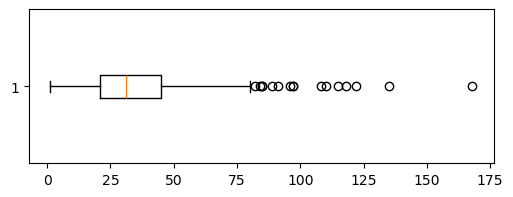

In [78]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert=False)

In [80]:
##Extract outliers from boxplot for Ozone column
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False
[item

SyntaxError: incomplete input (548757634.py, line 4)

In [82]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [84]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma) or (mu + 3*sigma)):
        print(x)

SyntaxError: invalid syntax (3854829438.py, line 5)

Text(0.5, 0, 'Theoretical Qunatiles')

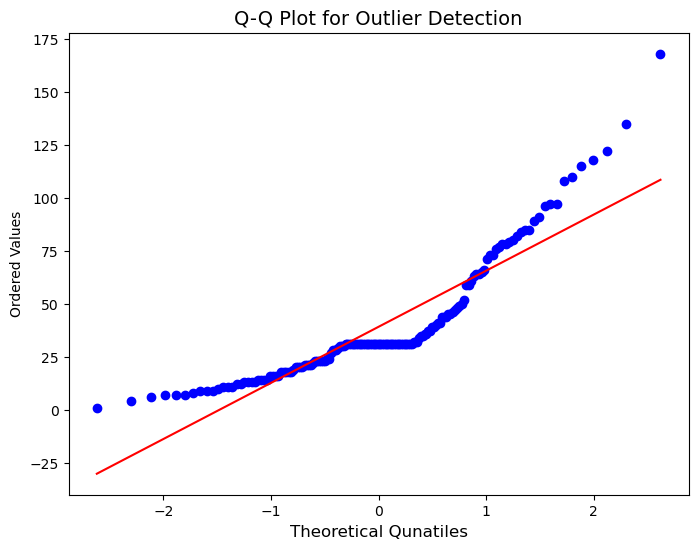

In [86]:
import scipy.stats as stats

##Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Qunatiles", fontsize=12)

In [88]:
##Observations
The data does not follow normal distribution as the data points are deviating sini

SyntaxError: invalid syntax (677707332.py, line 2)

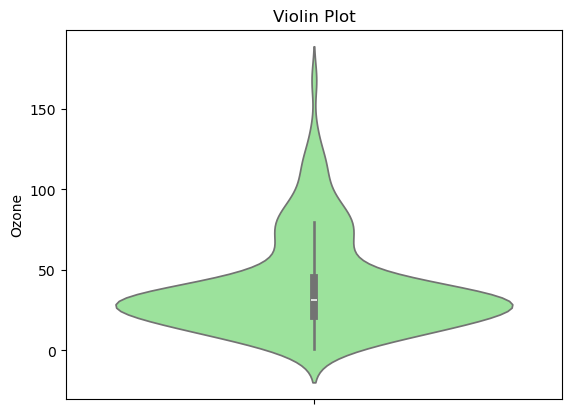

In [90]:
##create a figure for viol in plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

#show the plot 
plt.show()


##Other visualizations that could help understand the data

<Axes: xlabel='Weather', ylabel='Ozone'>

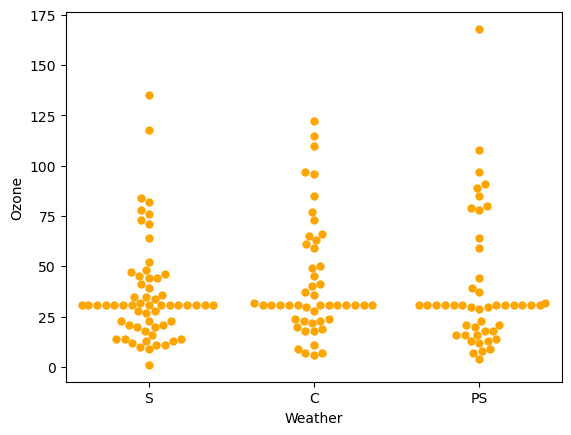

In [93]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",size=6)

<Axes: xlabel='Weather', ylabel='Ozone'>

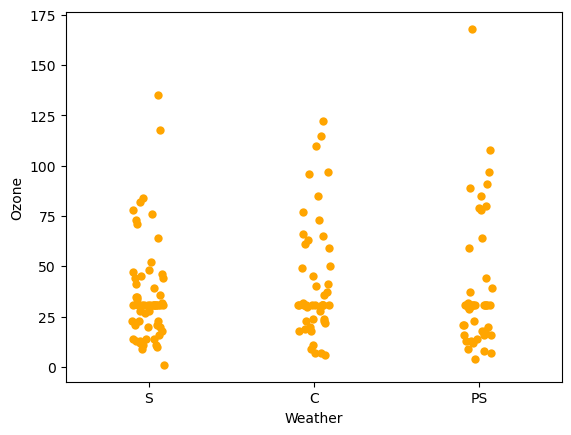

In [95]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

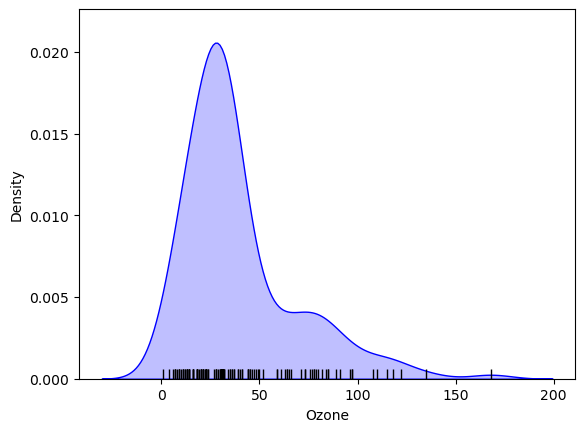

In [97]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

Correlation coefficient and pair plots

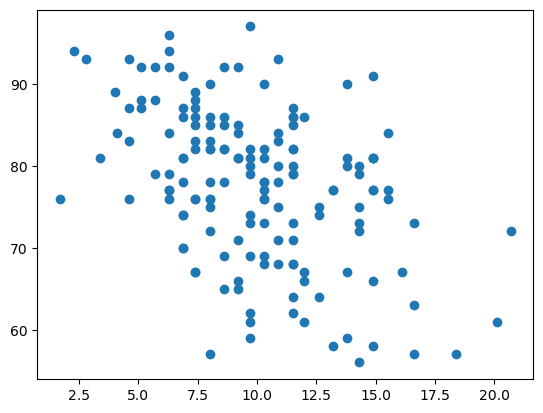

In [100]:
plt.scatter(data1["Wind"], data1["Temp"])

In [102]:
##Compute pearson correlation coefficient
#between Wind speed and Temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [ ]:
###Observation 
-The correlation betwwen wind and temp is observed to be negatively correlated with mild strength

In [106]:
#Read all numeric columns into a new table data1_numeric
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,41.0,7.4,67
1,36.0,36.0,8.0,72
2,12.0,12.0,12.6,74
3,18.0,18.0,11.5,62
4,31.0,31.0,14.3,56
...,...,...,...,...
152,20.0,20.0,11.5,68
153,41.0,41.0,7.4,67
154,30.0,30.0,6.9,70
155,31.0,31.0,13.2,77


In [112]:
#print correlation coefficieents for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,1.000000,-0.523738,0.597087
Solar,1.000000,1.000000,-0.523738,0.597087
Wind,-0.523738,-0.523738,1.000000,-0.441228
Temp,0.597087,0.597087,-0.441228,1.000000


#Observation
--THe Highest correlation strength between Ozone and Temp(0.597087)
--The next higher correlation strength is observed between Ozone and wind(-0.523738)
--The next higher correlation strength is observed between wind and temp(-0.441228)
--The least correlation is observed between solar and wind(-0.055874)(0.523738)

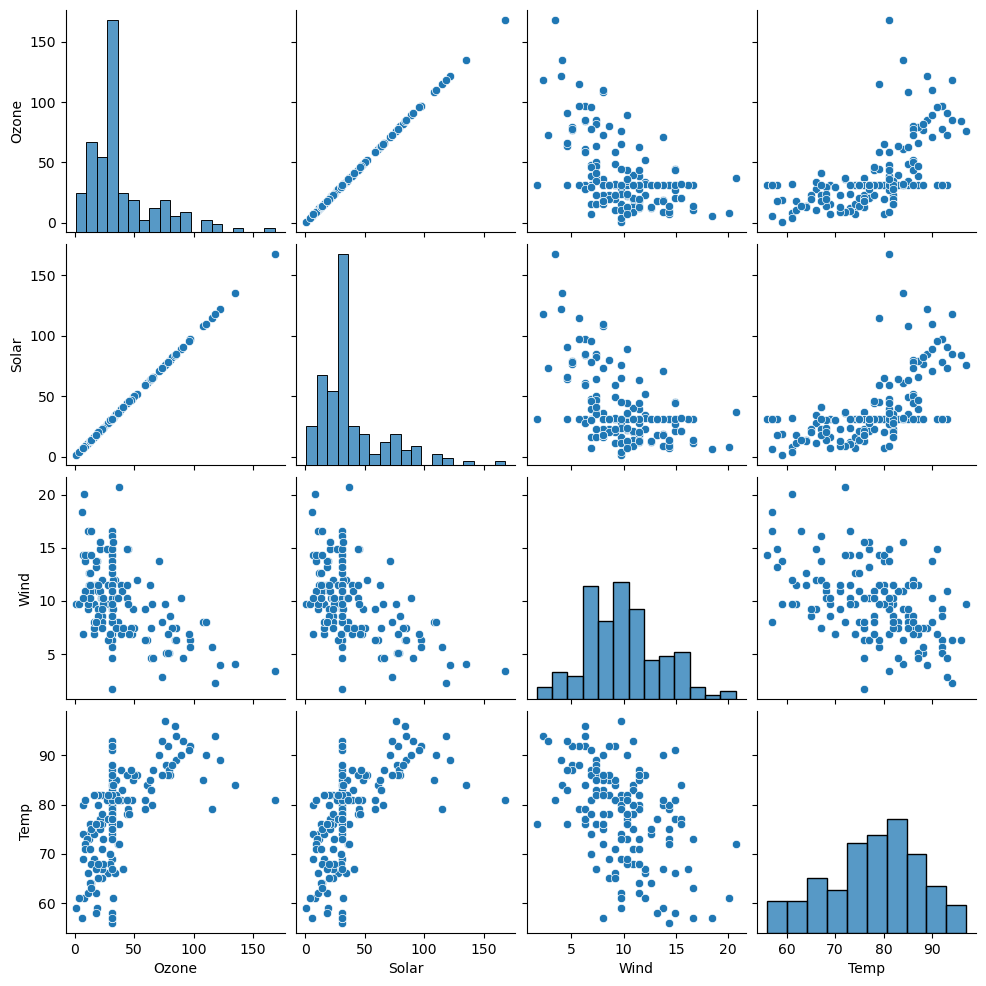

In [123]:
##Plot a pair plot between all numeric columns using seaborn
sns.pairplot(data1_numeric)

In [135]:
##Transformations
#Creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,41.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,36.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,12.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,18.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,31.0,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,20.0,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,41.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,30.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,31.0,13.2,27,2010,77,False,False,False,False,True,False,False,True


In [143]:
#Creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Weather'])
data2

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,41.0,7.4,5.0,1,2010,67,False,False,True
1,36.0,36.0,8.0,5.0,2,2010,72,True,False,False
2,12.0,12.0,12.6,5.0,3,2010,74,False,True,False
3,18.0,18.0,11.5,5.0,4,2010,62,False,False,True
4,31.0,31.0,14.3,5.0,5,2010,56,False,False,True
...,...,...,...,...,...,...,...,...,...,...
152,20.0,20.0,11.5,9.0,30,2010,68,False,False,True
153,41.0,41.0,7.4,5.0,1,2010,67,True,False,False
154,30.0,30.0,6.9,9.0,26,2010,70,False,True,False
155,31.0,31.0,13.2,9.0,27,2010,77,False,False,True


In [147]:
#Creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Weather,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0
0,41.0,41.0,7.4,1,2010,67,S,True,False,False,False,False
1,36.0,36.0,8.0,2,2010,72,C,True,False,False,False,False
2,12.0,12.0,12.6,3,2010,74,PS,True,False,False,False,False
3,18.0,18.0,11.5,4,2010,62,S,True,False,False,False,False
4,31.0,31.0,14.3,5,2010,56,S,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,20.0,11.5,30,2010,68,S,False,False,False,False,True
153,41.0,41.0,7.4,1,2010,67,C,True,False,False,False,False
154,30.0,30.0,6.9,26,2010,70,PS,False,False,False,False,True
155,31.0,31.0,13.2,27,2010,77,S,False,False,False,False,True


In [151]:
##Normalization of data
data1_numeric.values

array([[ 41. ,  41. ,   7.4,  67. ],
       [ 36. ,  36. ,   8. ,  72. ],
       [ 12. ,  12. ,  12.6,  74. ],
       [ 18. ,  18. ,  11.5,  62. ],
       [ 31. ,  31. ,  14.3,  56. ],
       [ 28. ,  28. ,  14.9,  66. ],
       [ 23. ,  23. ,   8.6,  65. ],
       [ 19. ,  19. ,  13.8,  59. ],
       [  8. ,   8. ,  20.1,  61. ],
       [ 31. ,  31. ,   8.6,  69. ],
       [  7. ,   7. ,   6.9,  74. ],
       [ 16. ,  16. ,   9.7,  69. ],
       [ 11. ,  11. ,   9.2,  66. ],
       [ 14. ,  14. ,  10.9,  68. ],
       [ 18. ,  18. ,  13.2,  58. ],
       [ 14. ,  14. ,  11.5,  64. ],
       [ 34. ,  34. ,  12. ,  66. ],
       [  6. ,   6. ,  18.4,  57. ],
       [ 30. ,  30. ,  11.5,  68. ],
       [ 11. ,  11. ,   9.7,  62. ],
       [  1. ,   1. ,   9.7,  59. ],
       [ 11. ,  11. ,  16.6,  73. ],
       [  4. ,   4. ,   9.7,  61. ],
       [ 32. ,  32. ,  12. ,  61. ],
       [ 31. ,  31. ,  16.6,  57. ],
       [ 31. ,  31. ,  14.9,  58. ],
       [ 31. ,  31. ,   8. ,  57. ],
 

In [155]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[0.24 0.24 0.3  0.27]
 [0.21 0.21 0.33 0.39]
 [0.07 0.07 0.57 0.44]
 [0.1  0.1  0.52 0.15]
 [0.18 0.18 0.66 0.  ]
 [0.16 0.16 0.69 0.24]
 [0.13 0.13 0.36 0.22]
 [0.11 0.11 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.18 0.36 0.32]]
